In [1]:
# importação de bibliotecas e funções
#utilizado Keras por ser uma abstaração sobre a Tensorflow que facilita seu uso
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Text(0.5, 1.0, '0')

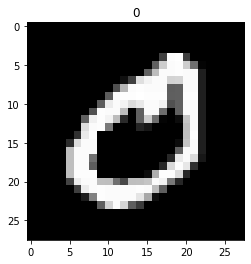

In [6]:
#importação dos daso e divisão em treinamento e teste
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()
#visualização de iamgens esecíficas
plt.imshow(x_treinamento[21], cmap= 'gray')
plt.title(y_treinamento[21])

In [9]:
#mudança de dimensões, originalmente estáem 25x28 e precisamos 784
x_treinamento = x_treinamento.reshape((len(x_treinamento), np.prod(x_treinamento.shape[1:])))
x_teste = x_teste.reshape((len(x_teste), np.prod(x_teste.shape[1:])))
x_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [12]:
#tranformação dos dados para normalização em formato float
x_treinamento = x_treinamento.astype('float32')
x_teste = x_teste.astype('float32')

In [13]:
#normalização (255 é o valor máximo de um pixel)
x_treinamento/=255
x_teste/=255
